In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,r2_score,adjusted_rand_score,mean_absolute_percentage_error

In [2]:
data=pd.read_csv("C:\\Users\\manish singh\\OneDrive\\Desktop\\exl_database\\loan_approval_dataset.csv")

In [3]:
df=data.copy()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
df.drop('loan_id',axis=1,inplace=True)

In [9]:
categorical=[]
numerical=[]

for col in df:
    if df[col].dtype=='O':
        categorical.append(col)
        
    else:
        numerical.append(col)

In [10]:

df[categorical]=df[categorical].apply(lambda x:x.str.strip())

In [11]:
print("categorical cols:",categorical)
print()
print("numerical cols:",numerical)

categorical cols: ['education', 'self_employed', 'loan_status']

numerical cols: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


# <center>=====Identifying Outliers====<center>

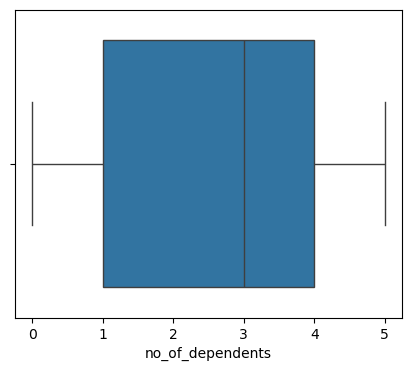

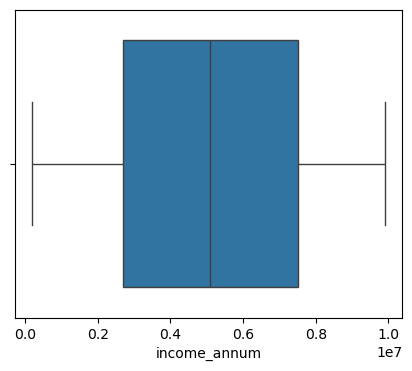

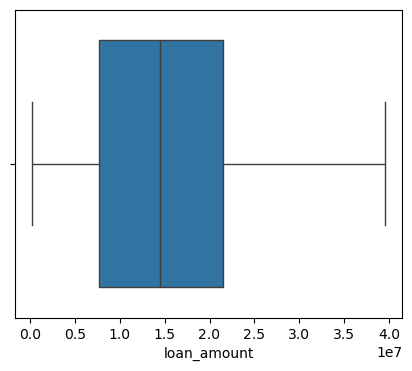

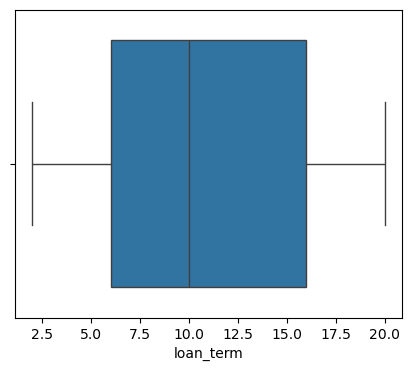

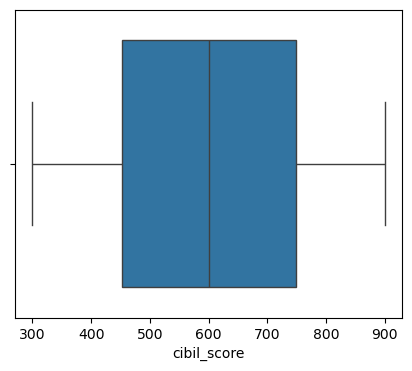

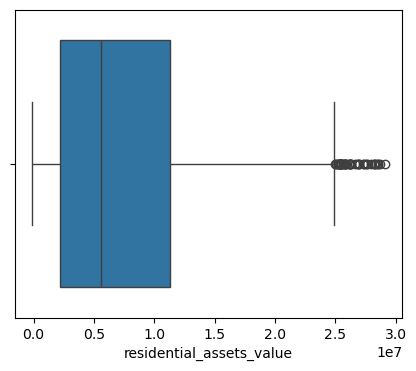

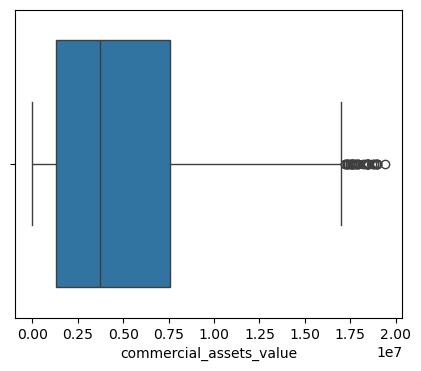

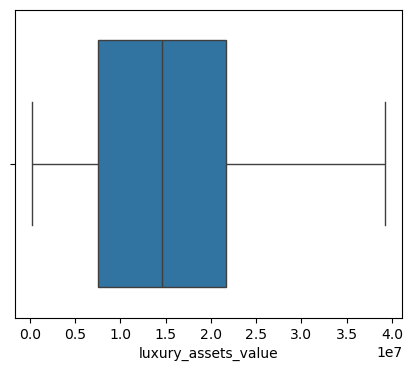

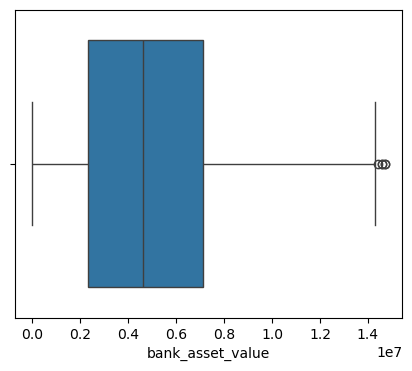

In [12]:
for col in df[numerical]:
    plt.figure(figsize=(5,4))
    sns.boxplot(df,x=col)

# <center>====Handling outliers by IQR method====</center>

In [13]:
outlier_cols=['residential_assets_value','commercial_assets_value','bank_asset_value']

In [14]:
def iqr_method(data,columns):
    data=df
    for col in columns:
        p25=df[col].quantile(0.25)
        p75=df[col].quantile(0.75)



        iqr=p75-p25
        uf=p75+1.5*iqr
        lf=p25-1.5*iqr

        df[(df[col]>uf) | (df[col]<lf)].shape

        df[(df[col]<uf) & (df[col]>lf)].shape

        df[col]=np.where(df[col]>uf,uf,np.where(df[col]<lf,lf,df[col]))




In [15]:
iqr_method(df,outlier_cols)

# <center><br>Distribution Curves  Before and After Handling Outliers</br><center>

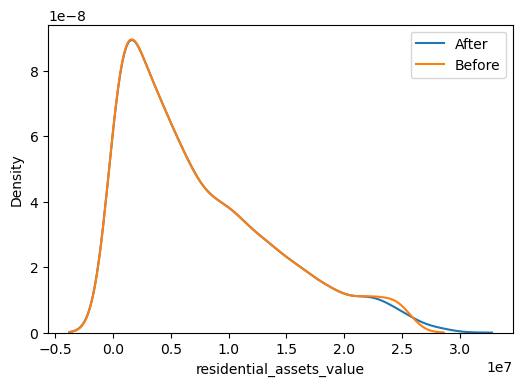

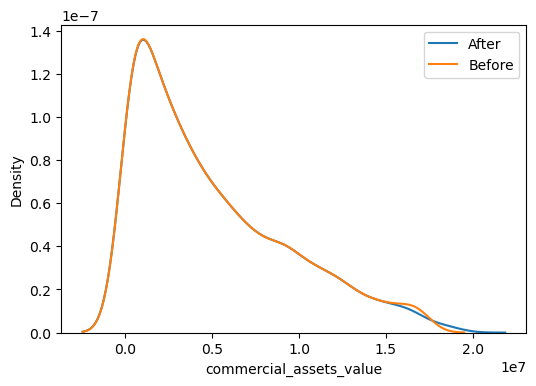

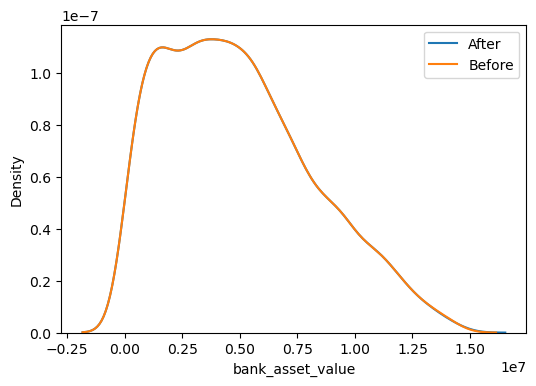

In [16]:
plt.figure(figsize=(6,4))
sns.kdeplot(data,x='residential_assets_value',label='After')
sns.kdeplot(df,x='residential_assets_value',label='Before')
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(data,x='commercial_assets_value',label='After')
sns.kdeplot(df,x='commercial_assets_value',label='Before')
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(data,x='bank_asset_value',label='After')
sns.kdeplot(df,x='bank_asset_value',label='Before')
plt.legend()

# <center><br>Boxplot Before and After Handling Outliers</br><center>

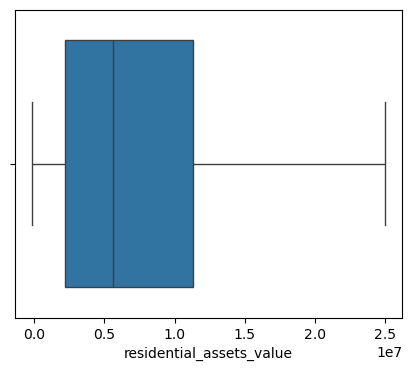

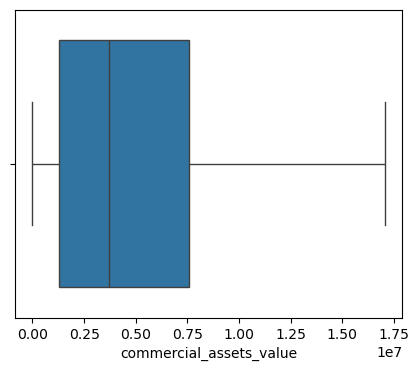

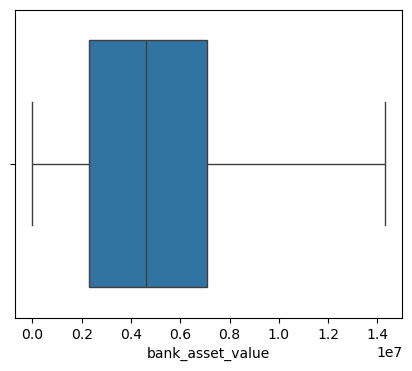

In [17]:
for col in outlier_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(df,x=col)

In [18]:
# spliting columns

x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [20]:
x_train.shape

(2988, 11)

In [21]:
x_test.shape

(1281, 11)

# <center>====Incoding and Scaling training data====<center>

In [22]:
x_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2047,1,Not Graduate,Yes,4300000,9400000,6,543,7400000.0,5200000.0,14800000,4200000.0
4002,1,Graduate,No,4600000,12700000,8,468,10400000.0,0.0,14500000,3900000.0
1268,3,Graduate,Yes,2200000,5300000,2,506,1600000.0,1700000.0,5800000,2800000.0
2283,1,Not Graduate,Yes,2000000,6600000,10,873,1400000.0,200000.0,6300000,2400000.0
2338,5,Graduate,No,6100000,20700000,20,482,9400000.0,2000000.0,16900000,5900000.0


In [23]:
ohe=OneHotEncoder()
rs=RobustScaler()

In [24]:
list[numerical]

list[['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']]

In [25]:
list[categorical]

list[['education', 'self_employed', 'loan_status']]

In [26]:
col_trans=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),
                                          ['education', 'self_employed']),('rs',RobustScaler(),numerical)],
                           remainder='passthrough')

In [27]:
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['education', 'self_employed']),
                                ('rs', RobustScaler(),
                                 ['no_of_dependents', 'income_annum',
                                  'loan_amount', 'loan_term', 'cibil_score',
                                  'residential_assets_value',
                                  'commercial_assets_value',
                                  'luxury_assets_value', 'bank_asset_value'])])

In [28]:
x_train_enc=col_trans.fit_transform(x_train)

In [29]:
x_train_enc=pd.DataFrame(x_train_enc,columns=col_trans.get_feature_names_out())

In [30]:
x_train_enc.head()

,ohe__education_Not Graduate,ohe__self_employed_Yes,rs__no_of_dependents,rs__income_annum,rs__loan_amount,rs__loan_term,rs__cibil_score,rs__residential_assets_value,rs__commercial_assets_value,rs__luxury_assets_value,rs__bank_asset_value
0,1.0,1.0,-0.666667,-0.16,-0.386525,-0.4,-0.178451,0.184282,0.217899,-0.006993,-0.083333
1,0.0,0.0,-0.666667,-0.10,-0.152482,-0.2,-0.430976,0.509485,-0.591440,-0.027972,-0.145833
2,0.0,1.0,0.000000,-0.58,-0.677305,-0.8,-0.303030,-0.444444,-0.326848,-0.636364,-0.375000
3,1.0,1.0,-0.666667,-0.62,-0.585106,0.0,0.932660,-0.466125,-0.560311,-0.601399,-0.458333
4,0.0,0.0,0.666667,0.20,0.414894,1.0,-0.383838,0.401084,-0.280156,0.139860,0.270833


In [31]:
x_train_enc.columns=x_train.columns

In [32]:
x_train_enc.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1.0,1.0,-0.666667,-0.16,-0.386525,-0.4,-0.178451,0.184282,0.217899,-0.006993,-0.083333
1,0.0,0.0,-0.666667,-0.10,-0.152482,-0.2,-0.430976,0.509485,-0.591440,-0.027972,-0.145833
2,0.0,1.0,0.000000,-0.58,-0.677305,-0.8,-0.303030,-0.444444,-0.326848,-0.636364,-0.375000
3,1.0,1.0,-0.666667,-0.62,-0.585106,0.0,0.932660,-0.466125,-0.560311,-0.601399,-0.458333
4,0.0,0.0,0.666667,0.20,0.414894,1.0,-0.383838,0.401084,-0.280156,0.139860,0.270833


# <center>Incoding y_train<center>

In [33]:
y_train

2047    Rejected
4002    Rejected
1268    Rejected
2283    Approved
2338    Rejected
          ...   
1122    Rejected
1573    Approved
2001    Rejected
1599    Approved
692     Approved
Name: loan_status, Length: 2988, dtype: object

In [34]:
le=LabelEncoder()

In [35]:
y_train=le.fit_transform(y_train)
y_train

array([1, 1, 1, ..., 1, 0, 0])

# <center>====Incoding and Scaling testing data====<center>

In [36]:
x_test.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
391,5,Graduate,Yes,2400000,8700000,18,877,2800000.0,2900000.0,7100000,1100000.0
1123,0,Not Graduate,No,9100000,18300000,14,458,6100000.0,9200000.0,34100000,10000000.0
869,3,Graduate,No,6600000,22100000,4,455,3800000.0,3000000.0,25100000,7400000.0
749,4,Not Graduate,No,5700000,19600000,8,691,8800000.0,2200000.0,12100000,3000000.0
3386,1,Not Graduate,No,6900000,20900000,4,574,3200000.0,1800000.0,25000000,5200000.0


In [37]:
x_test_enc=col_trans.transform(x_test)

In [38]:
x_test_enc=pd.DataFrame(x_test_enc,columns=col_trans.get_feature_names_out())

In [39]:
x_test_enc.head()

,ohe__education_Not Graduate,ohe__self_employed_Yes,rs__no_of_dependents,rs__income_annum,rs__loan_amount,rs__loan_term,rs__cibil_score,rs__residential_assets_value,rs__commercial_assets_value,rs__luxury_assets_value,rs__bank_asset_value
0,0.0,1.0,0.666667,-0.54,-0.436170,0.8,0.946128,-0.314363,-0.140078,-0.545455,-0.729167
1,1.0,0.0,-1.000000,0.80,0.244681,0.4,-0.464646,0.043360,0.840467,1.342657,1.125000
2,0.0,0.0,0.000000,0.30,0.514184,-0.6,-0.474747,-0.205962,-0.124514,0.713287,0.583333
3,1.0,0.0,0.333333,0.12,0.336879,-0.2,0.319865,0.336043,-0.249027,-0.195804,-0.333333
4,1.0,0.0,-0.666667,0.36,0.429078,-0.6,-0.074074,-0.271003,-0.311284,0.706294,0.125000


In [40]:
x_test_enc.columns=x_test.columns

In [41]:
x_test_enc.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.0,1.0,0.666667,-0.54,-0.436170,0.8,0.946128,-0.314363,-0.140078,-0.545455,-0.729167
1,1.0,0.0,-1.000000,0.80,0.244681,0.4,-0.464646,0.043360,0.840467,1.342657,1.125000
2,0.0,0.0,0.000000,0.30,0.514184,-0.6,-0.474747,-0.205962,-0.124514,0.713287,0.583333
3,1.0,0.0,0.333333,0.12,0.336879,-0.2,0.319865,0.336043,-0.249027,-0.195804,-0.333333
4,1.0,0.0,-0.666667,0.36,0.429078,-0.6,-0.074074,-0.271003,-0.311284,0.706294,0.125000


# <center>Incoding y_test<center>

In [42]:
y_test

391     Approved
1123    Rejected
869     Approved
749     Approved
3386    Approved
          ...   
3878    Approved
3209    Approved
2136    Approved
3331    Approved
3581    Rejected
Name: loan_status, Length: 1281, dtype: object

In [44]:
y_test=le.transform(y_test)

In [45]:
y_test

array([0, 1, 0, ..., 0, 0, 1])

# <center>====Building Model====</center>

In [49]:
log=LogisticRegression()

In [51]:
log.fit(x_train_enc,y_train)

LogisticRegression()

In [53]:
y_pred=log.predict(x_test_enc)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [54]:
y_test

array([0, 1, 0, ..., 0, 0, 1])

In [60]:
score=mean_squared_error(y_test,y_pred)*100
score

8.665105386416862

In [64]:
score1=r2_score(y_test,y_pred)*10
score1

6.301732209737828

In [65]:
score3=adjusted_rand_score(y_test,y_pred)
score3

0.6818783160030332